In [177]:
import csv 
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline 

### Explore the structure of the data and extract needed data


In [2]:
filename = 'spotifyglobalweekly20220609.csv' 
with open(filename) as f: 
    reader = csv.reader(f) 
    header_row = next(reader) 
    print(header_row)
    
    for index, column_header in enumerate(header_row): 
        print(index, column_header)
             
    artist_names, track_names, source, weeks_on_chart, peak_rank, streams= [], [], [], [], [], [] 
    for row in reader: 
        artist = str(row[2])  
        track = str(row[3])
        label_source = str(row[4])
        weeks_charting = int(row[7])
        peak_ranking = int(row[5]) 
        total_weekly_streams = int(row[8])
        title = str(row[2])
        artist_names.append(artist)
        track_names.append(track)
        source.append(label_source) 
        weeks_on_chart.append(weeks_charting)
        peak_rank.append(peak_ranking)
        streams.append(total_weekly_streams) 
    
    spot_df = {'Artist Names': artist_names, 'Track Names': track_names, 'Source': source, 'Weeks on Chart': weeks_on_chart, 'Peak Rank': peak_rank, 'Streams': streams}

['\ufeffrank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
0 ﻿rank
1 uri
2 artist_names
3 track_name
4 source
5 peak_rank
6 previous_rank
7 weeks_on_chart
8 streams


### Create pandas df from extracted data

In [3]:
SpotifyGlobalChartJune9th = pd.DataFrame(spot_df)

In [4]:
SpotifyGlobalChartJune9th

,Artist Names,Track Names,Source,Weeks on Chart,Peak Rank,Streams
0,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,Rhino,2,1,57221016
1,Harry Styles,As It Was,Columbia,10,1,56282016
2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,Rimas Entertainment LLC,5,2,39839157
3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,Rimas Entertainment LLC,5,3,37479812
4,Bad Bunny,Tití Me Preguntó,Rimas Entertainment LLC,5,5,32543225
...,...,...,...,...,...,...
195,"Mora, Sech",TUS LÁGRIMAS,Rimas Entertainment LLC,7,93,5765943
196,LE SSERAFIM,FEARLESS,SOURCE MUSIC,5,149,5751320
197,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,Parlophone UK,5,178,5750508
198,"Eminem, Nate Dogg",'Till I Collapse,Aftermath,50,81,5745070


### Get Descriptive Statistics for streams column

In [5]:
SpotifyGlobalChartJune9th['Streams'].describe()

count    2.000000e+02
mean     1.059363e+07
std      7.248791e+06
min      5.739641e+06
25%      6.558376e+06
50%      8.434314e+06
75%      1.128985e+07
max      5.722102e+07
Name: Streams, dtype: float64

### Get Descriptive Categorical Statistics for categorical data in Artist Name column

In [6]:
Artist_Categorical_stats = SpotifyGlobalChartJune9th['Artist Names'].describe()
print(Artist_Categorical_stats)

count           200
unique          141
top       Bad Bunny
freq             16
Name: Artist Names, dtype: object


### Get Descriptive data for tracks

In [7]:
SpotifyGlobalChartJune9th['Track Names'].describe() 

count                                                   200
unique                                                  200
top       Running Up That Hill (A Deal With God) - 2018 ...
freq                                                      1
Name: Track Names, dtype: object

### Sort SpotifyGlobalChartJune9th by streams, weeks charting & source(label..etc) in desc order

In [8]:
SpotifyGlobalChartJune9th.sort_values(by=['Streams', 'Source', 'Weeks on Chart'], inplace = True, ascending=False)

SpotifyGlobalChartJune9th

,Artist Names,Track Names,Source,Weeks on Chart,Peak Rank,Streams
0,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,Rhino,2,1,57221016
1,Harry Styles,As It Was,Columbia,10,1,56282016
2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,Rimas Entertainment LLC,5,2,39839157
3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,Rimas Entertainment LLC,5,3,37479812
4,Bad Bunny,Tití Me Preguntó,Rimas Entertainment LLC,5,5,32543225
...,...,...,...,...,...,...
195,"Mora, Sech",TUS LÁGRIMAS,Rimas Entertainment LLC,7,93,5765943
196,LE SSERAFIM,FEARLESS,SOURCE MUSIC,5,149,5751320
197,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,Parlophone UK,5,178,5750508
198,"Eminem, Nate Dogg",'Till I Collapse,Aftermath,50,81,5745070


### Create a new dataframe containing top 10 streamed artists on Spotify for the week ending June9th

In [9]:
June9thTop_charting = SpotifyGlobalChartJune9th[:11]

June9thTop_charting

,Artist Names,Track Names,Source,Weeks on Chart,Peak Rank,Streams
0,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,Rhino,2,1,57221016
1,Harry Styles,As It Was,Columbia,10,1,56282016
2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,Rimas Entertainment LLC,5,2,39839157
3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,Rimas Entertainment LLC,5,3,37479812
4,Bad Bunny,Tití Me Preguntó,Rimas Entertainment LLC,5,5,32543225
5,Bad Bunny,Moscow Mule,Rimas Entertainment LLC,5,2,27519714
6,Bad Bunny,Efecto,Rimas Entertainment LLC,5,7,25669809
7,Harry Styles,Late Night Talking,Columbia,3,2,25101509
8,KAROL G,PROVENZA,UMLE - Latino,7,6,25061392
9,"Post Malone, Doja Cat",I Like You (A Happier Song) (with Doja Cat),Mercury Records/Republic Records,1,10,24340885


### Create a data frame of Universal Music Group affliated labels/subsidaries

In [170]:
UMG_Affliated = ['Rimas Entertainment LLC', 'EMI', 'EMI Recorded Music Australia PTY LTD', 'UMLE - Latino','Mercury/Republic Records', 'Republic Records', 'Polydor Records', 'Def Jam', 'RBMG/Def Jam', 'Darkroom/Interscope', 
                 'Interscope', 'Interscope Records', 'KIDinaKORNER/Interscope Records',  'pgLang/Top Dawg Entertainment/Aftermath/Interscope Records', 
                 'Olivia Rodrigo PS', 'Geffen', 'Darkroom', 'Universal Republic Records', 'UMC (Universal Music Catalogue)', 'XO /Republic', 
                 'Island Records', 'Aftermath', 'Universal Music AB', 'Cash Money', 'Young Money Ent.', 'Universal Rec.', 
                 'Universal-Island Records Ltd.', 'Vertigo', 'Vertigo Berlin', 'Universal Music Spain S.L.', 'Mosley/ interscope','Bad Vibes Forever/EMPIRE']
             
UMG_sub = SpotifyGlobalChartJune9th[SpotifyGlobalChartJune9th.Source.isin(UMG_Affliated)]
    
UMG_labels = pd.DataFrame(UMG_sub)

UMG_labels

,Artist Names,Track Names,Source,Weeks on Chart,Peak Rank,Streams
2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,Rimas Entertainment LLC,5,2,39839157
3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,Rimas Entertainment LLC,5,3,37479812
4,Bad Bunny,Tití Me Preguntó,Rimas Entertainment LLC,5,5,32543225
5,Bad Bunny,Moscow Mule,Rimas Entertainment LLC,5,2,27519714
6,Bad Bunny,Efecto,Rimas Entertainment LLC,5,7,25669809
...,...,...,...,...,...,...
187,Olivia Rodrigo,happier,Olivia Rodrigo PS,55,12,5864662
192,Avicii,Wake Me Up,Universal Music AB,79,13,5789663
195,"Mora, Sech",TUS LÁGRIMAS,Rimas Entertainment LLC,7,93,5765943
198,"Eminem, Nate Dogg",'Till I Collapse,Aftermath,50,81,5745070


### Create a Warner Music Group Dataframe of it's affliated labels/artists

In [153]:
WMG_Affliated = ['Rhino', '300 Entertainment', 'Domino/Warner Records', 'Decaydance', 'Fueled By Ramen', 
                 'Decaydance/Fueled By Ramen', 'Warner Records', 'Parlophone', 'Parlophone UK', 
                 'Alantic/Arthouse Records', 'Nice Life/Alantic', 'Generation Now/Atlantic', 
                 'Alantic Records UK', 'WEA Latina', 'Tommy Boy Music, LLC', 'Macklemore']
             
WMG_sub = SpotifyGlobalChartJune9th[SpotifyGlobalChartJune9th.Source.isin(WMG_Affliated)]
    
WMG_labels = pd.DataFrame(WMG_sub)

WMG_labels

,Artist Names,Track Names,Source,Weeks on Chart,Peak Rank,Streams
0,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,Rhino,2,1,57221016
13,Jack Harlow,First Class,Generation Now/Atlantic,9,2,22150283
38,Anitta,Envolver,Warner Records,14,2,12684709
67,"Coldplay, BTS",My Universe,Parlophone UK,37,3,10074442
76,"Dua Lipa, DaBaby",Levitating (feat. DaBaby),Warner Records,88,4,9514299
80,Panic! At The Disco,House of Memories,Decaydance/Fueled By Ramen,7,64,9293572
94,Arctic Monkeys,505,Domino/Warner Records,23,53,8621633
95,The Walters,I Love You So,Warner Records,35,21,8573760
104,Benson Boone,In The Stars,Warner Records,6,54,8023252
111,"Megan Thee Stallion, Dua Lipa",Sweetest Pie,300 Entertainment,13,17,7878846


### Create a Sony Music Dataframe of affliated labels/artist

In [156]:
Sony_Affliated = ['Columbia', 'Sony Music Latin', 'Sony', 'Epic', 'Not Fit For Society/RCA Records',
                 'Kemosabe Records/RCA Records', 'RCA Records', 'RCA Records Label', 'Epic/Freebandz', 'Sony Music UK', 
                'Sony Music Latin/Duars Entertainment', 'Epic Amsterdam', 'Sony Music Entertainment Chile S.A',
                 'ITNO/Columbia', 'Thirty Knots/Columbia', 'Disruptor Records/Columbia', 'Winners Circle/RCA Records', 
                 'Monkey Puzzle Records/RCA Records', 'Syco Music', 'SOURCE MUSIC']
             
Sony_sub = SpotifyGlobalChartJune9th[SpotifyGlobalChartJune9th.Source.isin(Sony_Affliated)]
    
Sony_labels = pd.DataFrame(Sony_sub)

Sony_labels

,Artist Names,Track Names,Source,Weeks on Chart,Peak Rank,Streams
1,Harry Styles,As It Was,Columbia,10,1,56282016
7,Harry Styles,Late Night Talking,Columbia,3,2,25101509
14,"Shakira, Rauw Alejandro",Te Felicito,Sony Music Latin,7,15,21077467
15,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,48,1,19362515
16,"Camila Cabello, Ed Sheeran",Bam Bam (feat. Ed Sheeran),Epic,14,5,19302179
21,Elley Duhé,MIDDLE OF THE NIGHT,Not Fit For Society/RCA Records,24,11,16576631
25,Harry Styles,Matilda,Columbia,3,5,14565648
26,"Becky G, KAROL G",MAMIII,Kemosabe Records/RCA Records,17,5,14524348
28,Harry Styles,Music For a Sushi Restaurant,Columbia,3,6,14333973
30,Doja Cat,Woman,Kemosabe Records/RCA Records,48,6,13929127


### Create a dataframe of others/indie labels

In [171]:
others = [ 'Nabru Records LLC', 'King Records', 'Roc Nation W Smith P&D',
         'Big Machine Records LLC', 'Neon 16', 'BIGHIT MUSIC', 'Baby Records Inc', 'Negative Gains Productions', 
         'Sidhu Moose Wala', 'Jovem Dionisio', 'Thrive Music, LLC',  'Musical Freedom', 'Hollywood Records', 
         'Glassnote Entertainment Group LLC', 'P NATION', 'Rancho Humilde', 'Chocolate City Music', 'Three Quarter',
         'Giraffe Pakistan', 'Leah Kate, under exclusive license to 10K Projects / MDDN', 'STARSHIP Entertainment']
             
others_sub = SpotifyGlobalChartJune9th[SpotifyGlobalChartJune9th.Source.isin(others)]
    
others_labels = pd.DataFrame(others_sub)

others_labels

,Artist Names,Track Names,Source,Weeks on Chart,Peak Rank,Streams
27,Cris Mj,Una Noche en Medellín,Nabru Records LLC,15,9,14486776
45,Ryan Castro,Jordan,King Records,15,33,11808917
65,WILLOW,Wait a Minute!,Roc Nation W Smith P&D,12,28,10277785
125,BTS,Dynamite,BIGHIT MUSIC,94,2,7232790
131,Zion & Lennox,Yo Voy (feat. Daddy Yankee),Baby Records Inc,16,59,7144551
137,BTS,Butter,BIGHIT MUSIC,55,2,6831443
140,Sidhu Moose Wala,295,Sidhu Moose Wala,1,141,6760335
141,Jovem Dionisio,ACORDA PEDRINHO,Jovem Dionisio,3,77,6744020
144,"ACRAZE, Cherish",Do It To It,"Thrive Music, LLC",32,9,6703715
145,"Imanbek, BYOR",Belly Dancer,Musical Freedom,2,146,6697512


### Descriptive Statistics for entire Universal Music Group affliated labels

In [160]:
total_UMG_streams = UMG_labels['Streams'].sum() 
mean_streams = UMG_labels['Streams'].mean()
max_streams = UMG_labels['Streams'].max()
min_streams = UMG_labels['Streams'].min()

print(f"Total amount of Spotify streams UMG affliated artists garnered for the week ending on June 9th was: {total_UMG_streams}.")
print(f"\nThe average streams per UMG affliated artist was: {mean_streams}.")
print(f"\nThe max value of streams for a UMG affliated artist was: {max_streams}.")
print(f"\nThe min value of streams for a UMG affliated artist was: {min_streams}.")

Total amount of Spotify streams UMG affliated artists garnered for the week ending on June 9th was: 388743108.

The average streams per UMG affliated artist was: 8835070.636363637.

The max value of streams for a UMG affliated artist was: 25061392.

The min value of streams for a UMG affliated artist was: 5739641.


### Descriptive Statistics for entire Warner Music Group affliated labels

In [159]:
total_WMG_streams = WMG_labels['Streams'].sum() 
mean_streamsWMG = WMG_labels['Streams'].mean()
max_streamsWMG = WMG_labels['Streams'].max()
min_streamsWMG = WMG_labels['Streams'].min()

print(f"Total amount of Spotify streams WMG affliated artists garnered for the week ending on June 9th was: {total_WMG_streams}.")
print(f"\nThe average streams per WMG affliated artist was: {mean_streamsWMG}.")
print(f"\nThe max value of streams for a WMG affliated artist was: {max_streamsWMG}.")
print(f"\nThe min value of streams for a WMG affliated artist was: {min_streamsWMG}.")

Total amount of Spotify streams WMG affliated artists garnered for the week ending on June 9th was: 204894899.

The average streams per WMG affliated artist was: 11383049.944444444.

The max value of streams for a WMG affliated artist was: 57221016.

The min value of streams for a WMG affliated artist was: 5750508.


### Descriptive Statistics for entire Sony Music affliated labels

In [158]:
total_Sony_streams = Sony_labels['Streams'].sum() 
mean_streamsSony = Sony_labels['Streams'].mean()
max_streamsSony = Sony_labels['Streams'].max()
min_streamsSony = Sony_labels['Streams'].min()

print(f"Total amount of Spotify streams Sony Music affliated artists garnered for the week ending on June 9th was: {total_Sony_streams}.")
print(f"\nThe average streams per Sony Music affliated artist was: {mean_streamsSony}.")
print(f"\nThe max value of streams for a Sony Music affliated artist was: {max_streamsSony}.")
print(f"\nThe min value of streams for a Sony Music affliated artist was: {min_streamsSony}.")

Total amount of Spotify streams Sony Music affliated artists garnered for the week ending on June 9th was: 640552001.

The average streams per Sony Music affliated artist was: 11438428.589285715.

The max value of streams for a Sony Music affliated artist was: 56282016.

The min value of streams for a Sony Music affliated artist was: 5751320.


### Descriptive Statistics for Others/Indie labels

In [172]:
total_others_streams = others_labels['Streams'].sum() 
print(f"The total amount of streams garnered from 'others/indie labels' on Spotify was {total_others_streams}.")

The total amount of streams garnered from 'others/indie labels' on Spotify was 140080660.


### Vizualize top 10 streamed tracks on Spotify

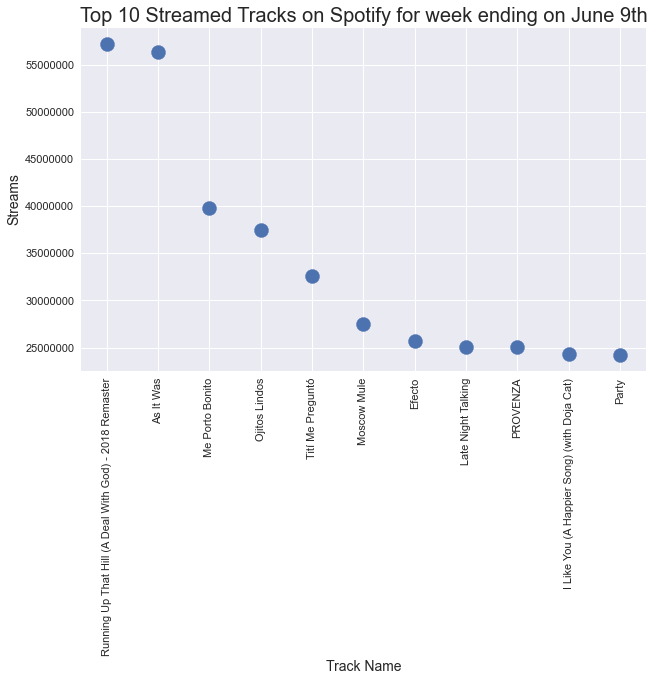

In [178]:
plt.style.use('seaborn') 
fig, ax = plt.subplots() 
ax.scatter(June9thTop_charting['Track Names'], June9thTop_charting['Streams'], s=200) 

ax.set_title("Top 10 Streamed Tracks on Spotify for week ending on June 9th", fontsize=20) 
ax.set_xlabel("Track Name", fontsize=14)
ax.set_ylabel("Streams", fontsize=14) 
plt.xticks(rotation = 90)
ax = plt.gca()

ax.tick_params(axis='both', which='major', labelsize=11)

plt.ticklabel_format(axis='y', style='plain', scilimits=None, 
                                   useOffset=None, useLocale=True, useMathText=None)

plt.show()


### Visualize UMG affliated Artist stream counts on Spotify

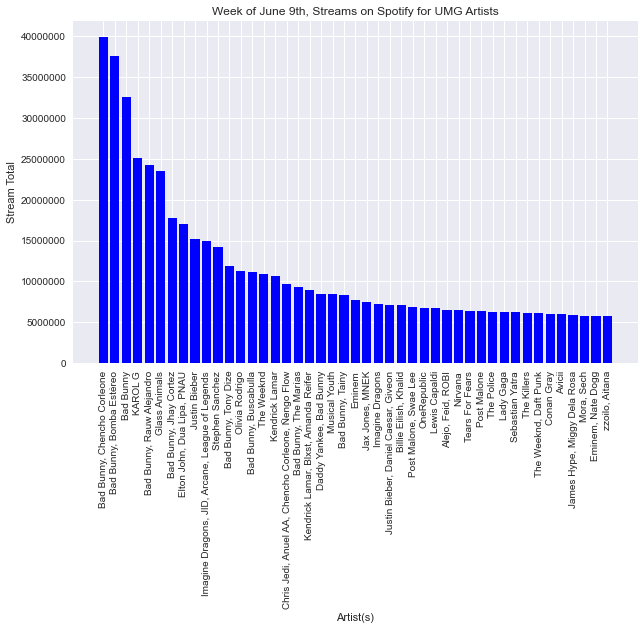

In [181]:
x_values = UMG_labels['Artist Names'] 
y_values = UMG_labels['Streams']
plt.style.use('seaborn-bright') 
plt.bar(x_values, y_values, data= UMG_labels, color="blue")

plt.xlabel("Artist(s)")
plt.xticks(rotation = 90)
plt.ylabel("Stream Total")
plt.title("Week of June 9th, Streams on Spotify for UMG Artists")      
plt.ticklabel_format(axis='y', style='plain', scilimits=None, 
                    useOffset=None, useLocale=True, useMathText=None)
plt.show()           


### Visualize WMG affliated Artist Stream Counts on Spotify

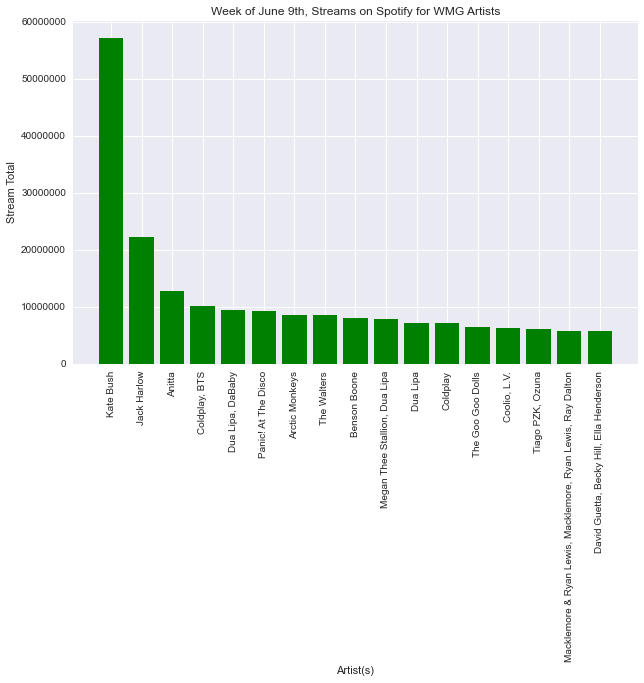

In [182]:
x_values = WMG_labels['Artist Names'] 
y_values = WMG_labels['Streams']
plt.style.use('seaborn-bright') 
plt.bar(x_values, y_values, data= WMG_labels, color="green")

plt.xlabel("Artist(s)")
plt.xticks(rotation = 90)
plt.ylabel("Stream Total")
plt.title("Week of June 9th, Streams on Spotify for WMG Artists")      
plt.ticklabel_format(axis='y', style='plain', scilimits=None, 
                    useOffset=None, useLocale=True, useMathText=None)
plt.show()  

### Visualize Sony Music affliated Artist Stream Counts on Spotify

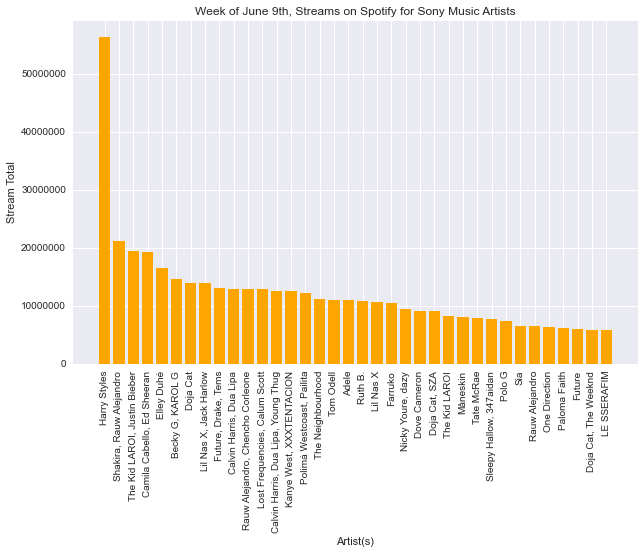

In [183]:
x_values = Sony_labels['Artist Names'] 
y_values = Sony_labels['Streams']
plt.style.use('seaborn-bright') 
plt.bar(x_values, y_values, data= Sony_labels, color="orange")

plt.xlabel("Artist(s)")
plt.xticks(rotation = 90)
plt.ylabel("Stream Total")
plt.title("Week of June 9th, Streams on Spotify for Sony Music Artists")      
plt.ticklabel_format(axis='y', style='plain', scilimits=None, 
                    useOffset=None, useLocale=True, useMathText=None)
plt.show() 

### Visualize Weekly Marketshare On Spotify per Major Music Label

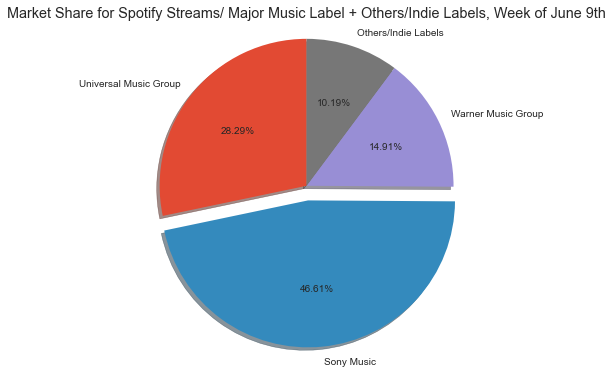

In [184]:
labels = ['Universal Music Group', 'Sony Music', 'Warner Music Group', 'Others/Indie Labels'] 
market_share = [total_UMG_streams, total_Sony_streams, total_WMG_streams, total_others_streams] 
explode = (0, 0.1, 0, 0) 
plt.style.use('ggplot') 
plt.title("Market Share for Spotify Streams/ Major Music Label + Others/Indie Labels, Week of June 9th") 
plt.pie(x=market_share, explode=explode, labels=labels, autopct='%.2f%%',
       shadow=True, startangle=90)
plt.axis('equal') 
plt.show()